In [1]:
# Pureclip peaks

In [2]:
# The individual scores (e.g., 3.27451, 7.42861, 18.3073) are crosslinking intensities at each nucleotide position within the peak. 
# These are derived from diagnostic events like truncations or mutations in the reads.

# chr1    14405   14409   3.27451;7.42861;18.3073;    29.0104 +

# The total score (29.0104) is the aggregate signal strength of the peak—used to rank or filter peaks based on confidence.
# PureCLIP uses a Hidden Markov Model (HMM) to detect these crosslink sites with high resolution, 
# modeling both signal and background noise.

# chr1    12647   12648   1.35871;        1.35871    +
# │       │       │       │               │          │
# │       │       │       │               │          └── Strand
# │       │       │       │               └────────────── Total score
# │       │       │       └──────────────────────────────── Individual position scores
# │       │       └──────────────────────────────────────── End position
# │       └──────────────────────────────────────────────── Start position
# └──────────────────────────────────────────────────────── Chromosome

In [3]:
library(rtracklayer)
library(ggplot2)
library(gridExtra)  # For arranging plots side by side

bind_sites_gr <- import("A27_13_pool.star.clam.PureCLIP.crosslink_sites.cov_inputSignal.bind.sites.bed",
                        format = "BED")

# View the objects
head(bind_sites_gr)

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomeInfoDb


At

GRanges object with 6 ranges and 2 metadata columns:
      seqnames      ranges strand |                   name     score
         <Rle>   <IRanges>  <Rle> |            <character> <numeric>
  [1]     chr1       12648      + |               1.35871;   1.35871
  [2]     chr1 14406-14409      + | 3.27451;7.42861;18.3..  29.01040
  [3]     chr1 14430-14432      + |      0.137023;4.77177;   4.90879
  [4]     chr1       14757      + |               10.1338;  10.13380
  [5]     chr1 14794-14796      + | 23.7771;20.837;4.062..  48.67680
  [6]     chr1 15833-15834      + |       2.57245;7.70249;  10.27490
  -------
  seqinfo: 25 sequences from an unspecified genome; no seqlengths

In [4]:
getwd()

[1] "/home/tanasa/Desktop/Projects_Sree_Richi_A2780_pureclip_sites_clam_alignments/A27_13_star_clam_pureclip_peaks_POOLED_samples_renamed_analysis_e20d20"

Warning message:
“Removed 15041 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range (`geom_bar()`).”


     score         
 Min.   :   0.000  
 1st Qu.:   2.210  
 Median :   6.968  
 Mean   :  18.516  
 3rd Qu.:  20.117  
 Max.   :2084.190  

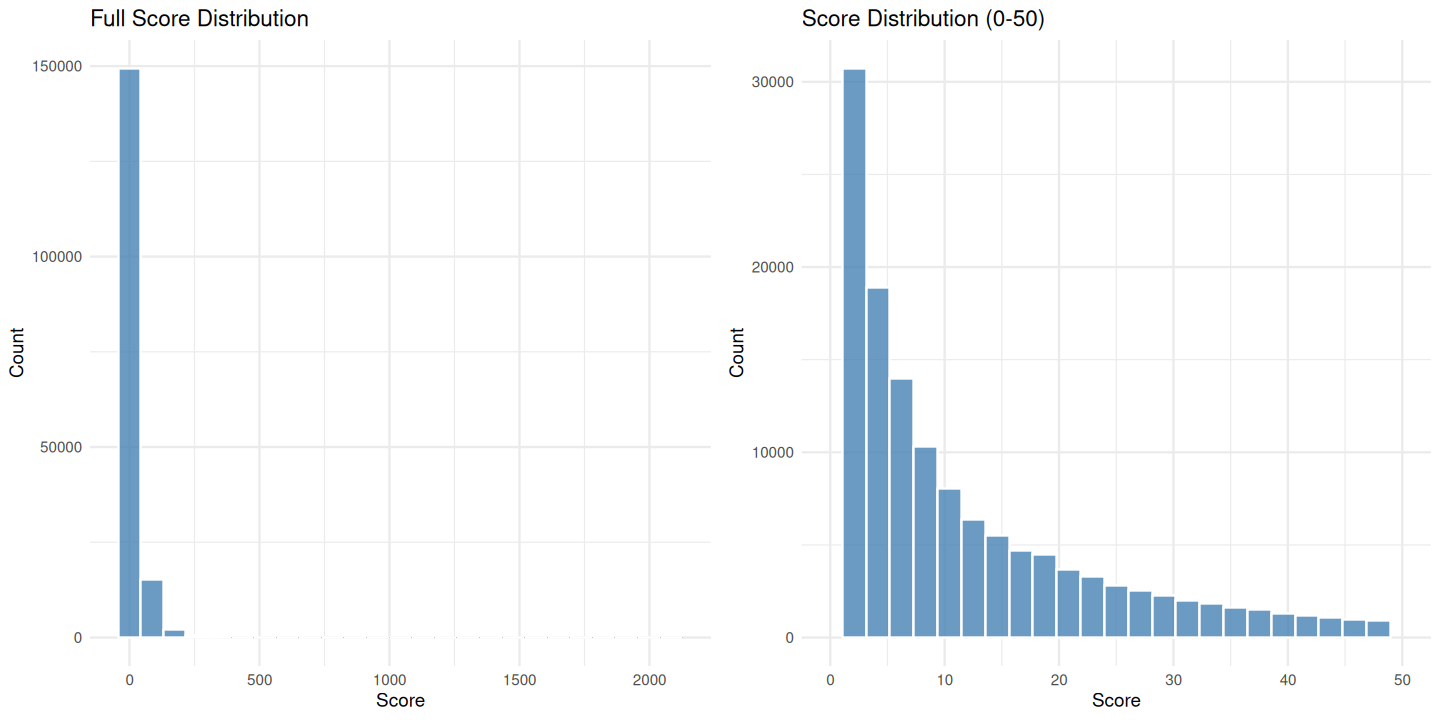

In [5]:
# Extract the 'score' metadata column
scores <- mcols(bind_sites_gr)$score
# Convert to data frame
score_df <- data.frame(score = mcols(bind_sites_gr)$score)

# Create first plot (full range)
p1 <- ggplot(score_df, aes(x = score)) +
  geom_histogram(bins = 25, fill = "steelblue", color = "white", alpha = 0.8) +
  labs(title = "Full Score Distribution",
       x = "Score",
       y = "Count") +
  theme_minimal()

# Create second plot (limited range)
p2 <- ggplot(score_df, aes(x = score)) +
  geom_histogram(bins = 25, fill = "steelblue", color = "white", alpha = 0.8) +
  xlim(0, 50) +  # Set x-axis limits from 0 to 50
  labs(title = "Score Distribution (0-50)",
       x = "Score",
       y = "Count") +
  theme_minimal()

# Set figure width (and height if needed)
options(repr.plot.width = 12, repr.plot.height = 6)

# Arrange plots side by side
grid.arrange(p1, p2, ncol = 2)

# Show summary
summary(score_df)

In [6]:
# Get all quartiles for context
quartiles <- quantile(scores, probs = c(0.25, 0.5, 0.75))
print(quartiles)

# Complete quartile analysis
scores <- mcols(bind_sites_gr)$score

# Calculate quartiles
quartiles <- quantile(scores, probs = c(0.25, 0.5, 0.75))
q1 <- quartiles[1]
q2 <- quartiles[2]  # median
q3 <- quartiles[3]

# Count peaks above each quartile
peaks_above_q1 <- sum(scores > q1)
peaks_above_q2 <- sum(scores > q2)
peaks_above_q3 <- sum(scores > q3)

# Count peaks between quartiles
peaks_q1_to_q2 <- sum(scores > q1 & scores <= q2)
peaks_q2_to_q3 <- sum(scores > q2 & scores <= q3)

# Display basic quartile info
cat("Quartile Analysis:\n")
cat("Q1 (25th percentile):", round(q1, 2), "\n")
cat("Q2 (50th percentile):", round(q2, 2), "\n") 
cat("Q3 (75th percentile):", round(q3, 2), "\n")

cat("\nPeak counts above quartiles:\n")
cat("Peaks above Q1:", peaks_above_q1, "\n")
cat("Peaks above Q2:", peaks_above_q2, "\n")
cat("Peaks above Q3:", peaks_above_q3, "\n")

cat("\nPeak distribution by quartiles:\n")
cat("Peaks between Q1 and Q2:", peaks_q1_to_q2, "\n")
cat("Peaks between Q2 and Q3:", peaks_q2_to_q3, "\n")
cat("Peaks above Q3:", peaks_above_q3, "\n")
cat("Peaks above Q1 (total):", peaks_above_q1, "\n")

cat("\nTotal peaks:", length(scores), "\n")

     25%      50%      75% 
 2.21014  6.96789 20.11680 
Quartile Analysis:
Q1 (25th percentile): 2.21 
Q2 (50th percentile): 6.97 
Q3 (75th percentile): 20.12 

Peak counts above quartiles:
Peaks above Q1: 125568 
Peaks above Q2: 83734 
Peaks above Q3: 41874 

Peak distribution by quartiles:
Peaks between Q1 and Q2: 41834 
Peaks between Q2 and Q3: 41860 
Peaks above Q3: 41874 
Peaks above Q1 (total): 125568 

Total peaks: 167497 


In [7]:
# Calculate peak lengths (width of each range)
peak_length <- width(bind_sites_gr)

# Check the lengths
summary(peak_length)
head(peak_length)
tail(peak_length)

length_df = data.frame(peak_length)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   2.858   3.000  45.000 

[1] 1 4 3 1 3 2

[1] 1 1 1 1 1 1

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   2.858   3.000  45.000 

[1] 1 4 3 1 3 2

[1] 1 1 1 1 1 1

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“Removed 7229 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range (`geom_bar()`).”


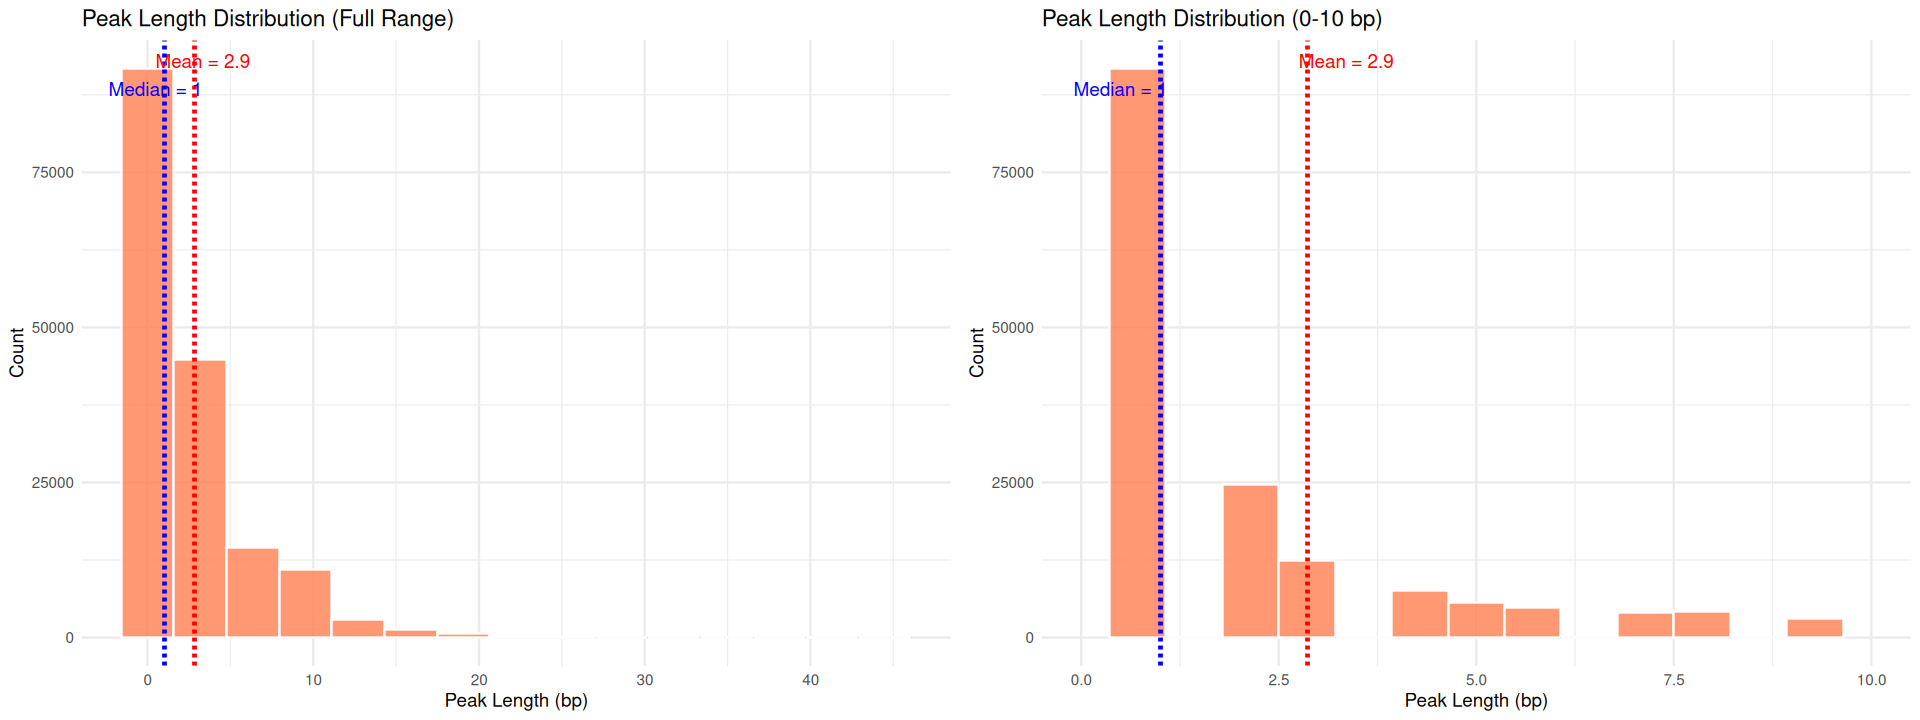

In [8]:
# Fixed peak length analysis code
library(ggplot2)
library(gridExtra)

# Calculate peak lengths (width of each range)
peak_length <- width(bind_sites_gr)

# Check the lengths
summary(peak_length)
head(peak_length)
tail(peak_length)

# Create data frame
length_df <- data.frame(peak_length = peak_length)

# Set wider figure size for better display
options(repr.plot.width = 16, repr.plot.height = 6)

# Create first plot (full range)
p1 <- ggplot(length_df, aes(x = peak_length)) +
  geom_histogram(bins = 15, fill = "coral", color = "white", alpha = 0.8) +
  geom_vline(aes(xintercept = mean(peak_length)), 
             color = "red", linetype = "dashed", size = 1) +
  geom_vline(aes(xintercept = median(peak_length)), 
             color = "blue", linetype = "dashed", size = 1) +
  annotate("text", x = mean(peak_length) + 0.5, y = Inf, 
           label = paste("Mean =", round(mean(peak_length), 1)), 
           vjust = 2, color = "red") +
  annotate("text", x = median(peak_length) - 0.5, y = Inf, 
           label = paste("Median =", median(peak_length)), 
           vjust = 4, color = "blue") +
  labs(title = "Peak Length Distribution (Full Range)",
       x = "Peak Length (bp)",
       y = "Count") +
  theme_minimal()

# Create second plot (limited range 0-10)
p2 <- ggplot(length_df, aes(x = peak_length)) +
  geom_histogram(bins = 15, fill = "coral", color = "white", alpha = 0.8) +
  geom_vline(aes(xintercept = mean(peak_length)), 
             color = "red", linetype = "dashed", size = 1) +
  geom_vline(aes(xintercept = median(peak_length)), 
             color = "blue", linetype = "dashed", size = 1) +
  annotate("text", x = mean(peak_length) + 0.5, y = Inf, 
           label = paste("Mean =", round(mean(peak_length), 1)), 
           vjust = 2, color = "red") +
  annotate("text", x = median(peak_length) - 0.5, y = Inf, 
           label = paste("Median =", median(peak_length)), 
           vjust = 4, color = "blue") +
  labs(title = "Peak Length Distribution (0-10 bp)",
       x = "Peak Length (bp)",
       y = "Count") +
  xlim(0, 10) +
  theme_minimal()

# Arrange plots side by side
grid.arrange(p1, p2, ncol = 2)

In [9]:
# Calculate peak lengths (width of each range)
peak_lengths <- width(bind_sites_gr)

# Check the lengths
summary(peak_lengths)
head(peak_lengths)
tail(peak_lengths)

# Complete quartile analysis for peak lengths
# Calculate quartiles
quartiles_length <- quantile(peak_lengths, probs = c(0.25, 0.5, 0.75))
q1_length <- quartiles_length[1]
q2_length <- quartiles_length[2]  # median
q3_length <- quartiles_length[3]

# Count peaks above each quartile
peaks_above_q1_length <- sum(peak_lengths > q1_length)
peaks_above_q2_length <- sum(peak_lengths > q2_length)
peaks_above_q3_length <- sum(peak_lengths > q3_length)

# Count peaks between quartiles
peaks_q1_to_q2_length <- sum(peak_lengths > q1_length & peak_lengths <= q2_length)
peaks_q2_to_q3_length <- sum(peak_lengths > q2_length & peak_lengths <= q3_length)

# Display basic quartile info
cat("Peak Length Quartile Analysis:\n")
cat("Q1 (25th percentile):", round(q1_length, 2), "bp\n")
cat("Q2 (50th percentile):", round(q2_length, 2), "bp\n") 
cat("Q3 (75th percentile):", round(q3_length, 2), "bp\n")

cat("\nPeak counts above length quartiles:\n")
cat("Peaks above Q1:", peaks_above_q1_length, "\n")
cat("Peaks above Q2:", peaks_above_q2_length, "\n")
cat("Peaks above Q3:", peaks_above_q3_length, "\n")

cat("\nPeak distribution by length quartiles:\n")
cat("Peaks between Q1 and Q2:", peaks_q1_to_q2_length, "\n")
cat("Peaks between Q2 and Q3:", peaks_q2_to_q3_length, "\n")
cat("Peaks above Q3:", peaks_above_q3_length, "\n")
cat("Peaks above Q1 (total):", peaks_above_q1_length, "\n")

cat("\nTotal peaks:", length(peak_lengths), "\n")

# Additional useful statistics for peak lengths
cat("\nAdditional Peak Length Statistics:\n")
cat("Single nucleotide peaks (1 bp):", sum(peak_lengths == 1), "\n")
cat("Multi-nucleotide peaks (>1 bp):", sum(peak_lengths > 1), "\n")
cat("Mean peak length:", round(mean(peak_lengths), 2), "bp\n")
cat("Standard deviation:", round(sd(peak_lengths), 2), "bp\n")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   2.858   3.000  45.000 

[1] 1 4 3 1 3 2

[1] 1 1 1 1 1 1

Peak Length Quartile Analysis:
Q1 (25th percentile): 1 bp
Q2 (50th percentile): 1 bp
Q3 (75th percentile): 3 bp

Peak counts above length quartiles:
Peaks above Q1: 75757 
Peaks above Q2: 75757 
Peaks above Q3: 38640 

Peak distribution by length quartiles:
Peaks between Q1 and Q2: 0 
Peaks between Q2 and Q3: 37117 
Peaks above Q3: 38640 
Peaks above Q1 (total): 75757 

Total peaks: 167497 

Additional Peak Length Statistics:
Single nucleotide peaks (1 bp): 91740 
Multi-nucleotide peaks (>1 bp): 75757 
Mean peak length: 2.86 bp
Standard deviation: 3.33 bp


In [10]:
# Create BED format with peak length as score in the 5th column
bed_for_igv <- data.frame(
  chr = as.character(seqnames(bind_sites_gr)),
  start = start(bind_sites_gr) - 1,  # 0-based coordinates
  end = end(bind_sites_gr),          # 1-based coordinates
  name = paste0("peak_", 1:length(bind_sites_gr)),  # 4th column: name
  score = width(bind_sites_gr),      # 5th column: score (peak length)
  strand = as.character(strand(bind_sites_gr))      # 6th column: strand
)

# Write to file
write.table(bed_for_igv, 
            file = "A27_13_pool.star.clam.PureCLIP.crosslink_sites.cov_inputSignal.bind.sites.igv.bed", 
            sep = "\t", 
            row.names = FALSE, 
            col.names = FALSE, 
            quote = FALSE)

cat("BED file for IGV saved as 'peaks_for_igv.bed'\n")

BED file for IGV saved as 'peaks_for_igv.bed'


In [11]:
# Complete quartile analysis
scores <- mcols(bind_sites_gr)$score

# Get all quartiles for context
quartiles <- quantile(scores, probs = c(0.25, 0.5, 0.75))
print(quartiles)

# Calculate quartiles
q1 <- quartiles[1]
q2 <- quartiles[2]  # median
q3 <- quartiles[3]

# Count peaks above each quartile
peaks_above_q1 <- sum(scores > q1)
peaks_above_q2 <- sum(scores > q2)
peaks_above_q3 <- sum(scores > q3)

# Count peaks between quartiles
peaks_q1_to_q2 <- sum(scores > q1 & scores <= q2)
peaks_q2_to_q3 <- sum(scores > q2 & scores <= q3)

# Display basic quartile info
cat("Quartile Analysis:\n")
cat("Q1 (25th percentile):", round(q1, 2), "\n")
cat("Q2 (50th percentile):", round(q2, 2), "\n") 
cat("Q3 (75th percentile):", round(q3, 2), "\n")

cat("\nPeak counts above quartiles:\n")
cat("Peaks above Q1:", peaks_above_q1, "\n")
cat("Peaks above Q2:", peaks_above_q2, "\n")
cat("Peaks above Q3:", peaks_above_q3, "\n")

cat("\nPeak distribution by quartiles:\n")
cat("Peaks between Q1 and Q2:", peaks_q1_to_q2, "\n")
cat("Peaks between Q2 and Q3:", peaks_q2_to_q3, "\n")
cat("Peaks above Q3:", peaks_above_q3, "\n")
cat("Peaks above Q1 (total):", peaks_above_q1, "\n")

cat("\nTotal peaks:", length(scores), "\n")

# Print peaks with score higher than Q1
cat("\n", paste(rep("=", 50), collapse=""), "\n")
cat("PEAKS WITH SCORE HIGHER THAN Q1 (", round(q1, 2), "):\n")
cat(paste(rep("=", 50), collapse=""), "\n")
peaks_above_q1_subset <- bind_sites_gr[scores > q1]
print(peaks_above_q1_subset)

# Print peaks with score higher than Q2 (median)
cat("\n", paste(rep("=", 50), collapse=""), "\n")
cat("PEAKS WITH SCORE HIGHER THAN Q2 (", round(q2, 2), "):\n")
cat(paste(rep("=", 50), collapse=""), "\n")
peaks_above_q2_subset <- bind_sites_gr[scores > q2]
print(peaks_above_q2_subset)

     25%      50%      75% 
 2.21014  6.96789 20.11680 
Quartile Analysis:
Q1 (25th percentile): 2.21 
Q2 (50th percentile): 6.97 
Q3 (75th percentile): 20.12 

Peak counts above quartiles:
Peaks above Q1: 125568 
Peaks above Q2: 83734 
Peaks above Q3: 41874 

Peak distribution by quartiles:
Peaks between Q1 and Q2: 41834 
Peaks between Q2 and Q3: 41860 
Peaks above Q3: 41874 
Peaks above Q1 (total): 125568 

Total peaks: 167497 

PEAKS WITH SCORE HIGHER THAN Q1 ( 2.21 ):
GRanges object with 125568 ranges and 2 metadata columns:
           seqnames      ranges strand |                   name     score
              <Rle>   <IRanges>  <Rle> |            <character> <numeric>
       [1]     chr1 14406-14409      + | 3.27451;7.42861;18.3..  29.01040
       [2]     chr1 14430-14432      + |      0.137023;4.77177;   4.90879
       [3]     chr1       14757      + |               10.1338;  10.13380
       [4]     chr1 14794-14796      + | 23.7771;20.837;4.062..  48.67680
       [5]     chr1 1

In [12]:
# Convert peaks above Q1 to BED format and save
peaks_q1_bed <- data.frame(
  chr = as.character(seqnames(peaks_above_q1_subset)),
  start = start(peaks_above_q1_subset) - 1,  # 0-based coordinates
  end = end(peaks_above_q1_subset),
  name = paste0("peak_", 1:length(peaks_above_q1_subset)),
  score = mcols(peaks_above_q1_subset)$score,
  strand = as.character(strand(peaks_above_q1_subset))
)

write.table(peaks_q1_bed, 
            file = "A27_13_pool.star.clam.PureCLIP.crosslink_sites.cov_inputSignal.bind.sites.peaks_above_Q1.bed", 
            sep = "\t", row.names = FALSE, col.names = FALSE, quote = FALSE)

# Convert peaks above Q2 to BED format and save
peaks_q2_bed <- data.frame(
  chr = as.character(seqnames(peaks_above_q2_subset)),
  start = start(peaks_above_q2_subset) - 1,  # 0-based coordinates
  end = end(peaks_above_q2_subset),
  name = paste0("peak_", 1:length(peaks_above_q2_subset)),
  score = mcols(peaks_above_q2_subset)$score,
  strand = as.character(strand(peaks_above_q2_subset))
)

write.table(peaks_q2_bed, 
            file = "A27_13_pool.star.clam.PureCLIP.crosslink_sites.cov_inputSignal.bind.sites.peaks_above_Q2.bed", 
            sep = "\t", row.names = FALSE, col.names = FALSE, quote = FALSE)

cat("Files saved:\n")
cat("- peaks_above_Q1.bed (", nrow(peaks_q1_bed), "peaks)\n")
cat("- peaks_above_Q2.bed (", nrow(peaks_q2_bed), "peaks)\n")

Files saved:
- peaks_above_Q1.bed ( 125568 peaks)
- peaks_above_Q2.bed ( 83734 peaks)


In [13]:
# Extending the sited with 50 bp on the right and on the left, and merge the extended  sites that overlap

In [14]:
# Extend with boundary checking
extend_sites <- function(gr, extension = 20) {
    # Get chromosome lengths (you may need to adjust based on your genome)
    # For now, we'll just extend without boundary checking
    
    extended <- gr
    start(extended) <- pmax(1, start(extended) - extension)  # Don't go below 1
    end(extended) <- end(extended) + extension
    
    return(extended)
}

# Apply extension
extended_sites <- extend_sites(bind_sites_gr, extension = 20)

# Merge overlapping sites
merged_sites <- reduce(extended_sites, min.gapwidth = 21) # min.gapwidth = 21 means any gap < 21 (i.e., ≤20 bp) gets merged.

# Compare before and after
cat("Analysis of extension and merging:\n")
cat("Original sites:", length(bind_sites_gr), "\n")
cat("After extension:", length(extended_sites), "\n")
cat("After merging:", length(merged_sites), "\n")
cat("Sites merged:", length(bind_sites_gr) - length(merged_sites), "\n")
cat("Merge percentage:", round(100 * (length(bind_sites_gr) - length(merged_sites)) / length(bind_sites_gr), 1), "%\n")

Analysis of extension and merging:
Original sites: 167497 
After extension: 167497 
After merging: 96346 
Sites merged: 71151 
Merge percentage: 42.5 %


In [15]:
# Summary statistics
cat("Width comparison:\n")
cat("Original sites - median width:", median(width(bind_sites_gr)), "bp\n")
cat("Extended sites - median width:", median(width(extended_sites)), "bp\n")
cat("Merged sites - median width:", median(width(merged_sites)), "bp\n")

# Size distribution
cat("\nSize distribution of merged sites:\n")
merged_widths <- width(merged_sites)
cat("1-100 bp:", sum(merged_widths <= 100), "sites\n")
cat("101-200 bp:", sum(merged_widths > 100 & merged_widths <= 200), "sites\n")
cat("201-500 bp:", sum(merged_widths > 200 & merged_widths <= 500), "sites\n")
cat(">500 bp:", sum(merged_widths > 500), "sites\n")

Width comparison:
Original sites - median width: 1 bp
Extended sites - median width: 41 bp
Merged sites - median width: 45 bp

Size distribution of merged sites:
1-100 bp: 84232 sites
101-200 bp: 11105 sites
201-500 bp: 972 sites
>500 bp: 37 sites


In [16]:
head(merged_sites)
tail(merged_sites)

GRanges object with 6 ranges and 0 metadata columns:
      seqnames      ranges strand
         <Rle>   <IRanges>  <Rle>
  [1]     chr1 12628-12668      +
  [2]     chr1 14386-14452      +
  [3]     chr1 14737-14816      +
  [4]     chr1 15813-15854      +
  [5]     chr1 16655-16746      +
  [6]     chr1 16837-16912      +
  -------
  seqinfo: 25 sequences from an unspecified genome; no seqlengths

GRanges object with 6 ranges and 0 metadata columns:
      seqnames            ranges strand
         <Rle>         <IRanges>  <Rle>
  [1]     chrY 57210565-57210645      -
  [2]     chrY 57210733-57210810      -
  [3]     chrY 57211538-57211637      -
  [4]     chrY 57211752-57211816      -
  [5]     chrY 57212053-57212093      -
  [6]     chrY 57212138-57212204      -
  -------
  seqinfo: 25 sequences from an unspecified genome; no seqlengths

In [17]:
# Save merged sites as BED file
merged_bed <- data.frame(
    chr = as.character(seqnames(merged_sites)),
    start = start(merged_sites) - 1,  # Convert to 0-based
    end = end(merged_sites),
    name = paste0("merged_", 1:length(merged_sites)),
    score = "",  # Use total score if available
    strand = "."
)

write.table(merged_bed, 
            file = "A27_13_pool.star.clam.PureCLIP.crosslink_sites.cov_inputSignal.bind.sites.extended20_merged20_binding_sites.bed", 
            sep = "\t", row.names = FALSE, col.names = FALSE, quote = FALSE)


In [18]:
# Also save the extended (non-merged) sites
extended_bed <- data.frame(
    chr = as.character(seqnames(extended_sites)),
    start = start(extended_sites) - 1,
    end = end(extended_sites),
    name = paste0("extended_", 1:length(extended_sites)),
    score = mcols(extended_sites)$score,
    strand = as.character(strand(extended_sites))
)

write.table(extended_bed, 
            file = "A27_13_pool.star.clam.PureCLIP.crosslink_sites.cov_inputSignal.bind.sites.extended20_binding_sites.bed", 
            sep = "\t", row.names = FALSE, col.names = FALSE, quote = FALSE)

cat("Files saved:\n")
cat("- extended_binding_sites.bed (", length(extended_sites), "sites)\n")
cat("- extended_merged_binding_sites.bed (", length(merged_sites), "sites)\n")


Files saved:
- extended_binding_sites.bed ( 167497 sites)
- extended_merged_binding_sites.bed ( 96346 sites)


In [19]:
# to compare the extended peaks with CLAM peaks and Lanceotron peaks 

In [20]:
library(data.table)

# Read the file
clam <- fread(
  "CLAM_13P_narrow_peaks.Richi.combined.bed", 
  sep = "\t",
  header = FALSE,
  quote = "",
  fill = TRUE
)

colnames(clam) <- c("chrom", "start", "end", "transcript", "score", "strand",
                    "enrichment", "p_value", "adj_p_value", "extra")

head(clam, 2)
tail(clam, 2)

# Keep only columns 1–6
clam_bed <- clam[, 1:6]

# Rename columns according to CLAM BED6+ structure
colnames(clam_bed) <- c("chrom",    # Chromosome
                        "start",    # Start (0-based)
                        "end",      # End (1-based)
                        "transcript", # Transcript or peak ID
                        "score",    # Usually 1000 in CLAM output
                        "strand")   # + or -

# Preview
head(clam_bed, 2)
tail(clam_bed, 2)


Attaching package: ‘data.table’


The following object is masked from ‘package:GenomicRanges’:

    shift


The following object is masked from ‘package:IRanges’:

    shift


The following objects are masked from ‘package:S4Vectors’:

    first, second




chrom,start,end,transcript,score,strand,enrichment,p_value,adj_p_value,extra
<chr>,<int>,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
chr1,15996,16096,ENSG00000227232-1,1000,-,2.68,1.269e-07,1.256e-05,.
chr1,629871,629971,ENSG00000293331-1,1000,-,1.33,0.000e+00,0.000e+00,.


chrom,start,end,transcript,score,strand,enrichment,p_value,adj_p_value,extra
<chr>,<int>,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
GL000219.1,58624,58724,ENSG00000273748-3,1000,-,1.82,0.0001971,0.007885,.
KI270713.1,21961,22061,ENSG00000275405-1,1000,-,0.89,0.0017480,0.003497,.


chrom,start,end,transcript,score,strand
<chr>,<int>,<int>,<chr>,<int>,<chr>
chr1,15996,16096,ENSG00000227232-1,1000,-
chr1,629871,629971,ENSG00000293331-1,1000,-


chrom,start,end,transcript,score,strand
<chr>,<int>,<int>,<chr>,<int>,<chr>
GL000219.1,58624,58724,ENSG00000273748-3,1000,-
KI270713.1,21961,22061,ENSG00000275405-1,1000,-


Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 3064 rows containing non-finite outside the scale range (`stat_bin()`).”


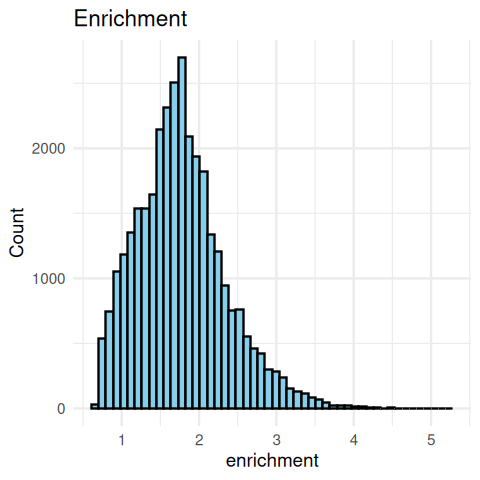

Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 3064 rows containing non-finite outside the scale range (`stat_bin()`).”


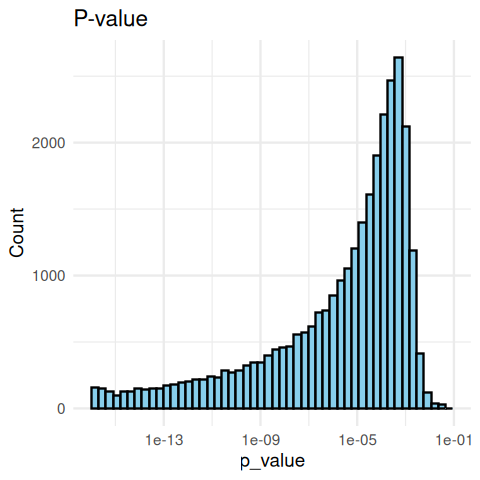

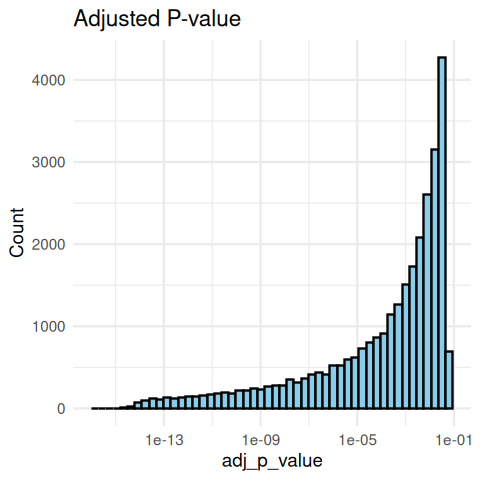

In [21]:
# Compute peak width
clam[, peak_width := end - start]

# Function to make a histogram with ggplot2
plot_hist <- function(data, col, title, bins = 50, log_scale = FALSE) {
  p <- ggplot(data, aes(x = .data[[col]])) +
    geom_histogram(bins = bins, fill = "skyblue", color = "black") +
    theme_minimal() +
    labs(title = title, x = col, y = "Count")
  if (log_scale) {
    p <- p + scale_x_log10()
  }
  p
}


options(repr.plot.width = 4, repr.plot.height = 4)   
plot_hist(clam, "enrichment", "Enrichment")

options(repr.plot.width = 4, repr.plot.height = 4)   
plot_hist(clam, "p_value", "P-value", log_scale = TRUE)

options(repr.plot.width = 4, repr.plot.height = 4)
plot_hist(clam, "adj_p_value", "Adjusted P-value", log_scale = TRUE)

In [22]:
# Summary statistics for peak length and score
summary_stats <- clam[, .(
  n_peaks = .N,
  length_min = min(peak_width),
  length_max = max(peak_width),
  length_mean = mean(peak_width),
  length_median = median(peak_width),
  score_min = min(score),
  score_max = max(score),
  score_mean = mean(score),
  score_median = median(score)
)]

summary_stats

n_peaks,length_min,length_max,length_mean,length_median,score_min,score_max,score_mean,score_median
<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
33104,100,100,100,100,1000,1000,1000,1000


In [23]:
library(rtracklayer)
library(data.table)

# Read the file into lanceotron_peaks
lanceotron_peaks <- fread(
  "LANCEOTRON_A27_13_lanceotron.star.clam.classical.chr.bed", 
  sep = "\t",
  header = FALSE,
  quote = "",
  fill = TRUE
)

# Check the first few rows
head(lanceotron_peaks, 2)
tail(lanceotron_peaks, 2)

# Assign the proper column names
colnames(lanceotron_peaks) <- c(
  "chrom",
  "start", 
  "end",
  "overall_peak_score",
  "shape_score",
  "enrichment_score", 
  "pvalue_input",
  "max_coverage_position",
  "region_id",
  "pvalue_chrom",
  "pvalue_10kb",
  "pvalue_20kb", 
  "pvalue_30kb",
  "pvalue_40kb",
  "pvalue_50kb",
  "pvalue_60kb",
  "pvalue_70kb",
  "pvalue_80kb",
  "pvalue_90kb",
  "pvalue_100kb"
)

# Check the first few rows
head(lanceotron_peaks, 2)
tail(lanceotron_peaks, 2)

# Check the structure of the data
str(lanceotron_peaks)

# Summary of the data
cat("Number of peaks:", nrow(lanceotron_peaks), "\n")
cat("Number of columns:", ncol(lanceotron_peaks), "\n")


V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,28136,28325,0.002789292,0.006670084,0.008962766,0.0000000,28136,1011,5.757488,0.003730148,0.002168693,0.01427318,0.01427318,0.01427318,0.01427318,0.01427318,0.01427318,0.01427318,0.01427318
chr1,28503,29894,0.959739100,0.348174840,0.999999940,0.0874067,29259,1012,100.000000,1.283114938,0.849544371,1.77038561,1.77038561,1.77038561,1.77038561,1.77038561,1.77038561,1.77038561,1.77038561


V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrY,57206633,57207872,0.9650113,0.3713646,1,11.0657,57207545,144176,100,100,100,5.617425,6.313634,6.906327,7.435529,7.90755,8.148329,8.476276,8.795223
chrY,57207942,57211089,0.9994772,0.9995834,1,100.0000,57209832,144177,100,100,100,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000


chrom,start,end,overall_peak_score,shape_score,enrichment_score,pvalue_input,max_coverage_position,region_id,pvalue_chrom,pvalue_10kb,pvalue_20kb,pvalue_30kb,pvalue_40kb,pvalue_50kb,pvalue_60kb,pvalue_70kb,pvalue_80kb,pvalue_90kb,pvalue_100kb
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1,28136,28325,0.002789292,0.006670084,0.008962766,0.0000000,28136,1011,5.757488,0.003730148,0.002168693,0.01427318,0.01427318,0.01427318,0.01427318,0.01427318,0.01427318,0.01427318,0.01427318
chr1,28503,29894,0.959739100,0.348174840,0.999999940,0.0874067,29259,1012,100.000000,1.283114938,0.849544371,1.77038561,1.77038561,1.77038561,1.77038561,1.77038561,1.77038561,1.77038561,1.77038561


chrom,start,end,overall_peak_score,shape_score,enrichment_score,pvalue_input,max_coverage_position,region_id,pvalue_chrom,pvalue_10kb,pvalue_20kb,pvalue_30kb,pvalue_40kb,pvalue_50kb,pvalue_60kb,pvalue_70kb,pvalue_80kb,pvalue_90kb,pvalue_100kb
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrY,57206633,57207872,0.9650113,0.3713646,1,11.0657,57207545,144176,100,100,100,5.617425,6.313634,6.906327,7.435529,7.90755,8.148329,8.476276,8.795223
chrY,57207942,57211089,0.9994772,0.9995834,1,100.0000,57209832,144177,100,100,100,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000


Classes ‘data.table’ and 'data.frame':	143167 obs. of  20 variables:
 $ chrom                : chr  "chr1" "chr1" "chr1" "chr1" ...
 $ start                : int  28136 28503 90126 132321 134276 140735 142672 144005 146888 147438 ...
 $ end                  : int  28325 29894 90541 132514 134436 142333 143415 144627 147307 147878 ...
 $ overall_peak_score   : num  2.79e-03 9.60e-01 1.13e-03 4.64e-08 5.61e-04 ...
 $ shape_score          : num  6.67e-03 3.48e-01 7.18e-04 1.86e-06 1.75e-03 ...
 $ enrichment_score     : num  0.00896 1 0.625 0.02852 0.06106 ...
 $ pvalue_input         : num  0 0.0874 100 3.6838 100 ...
 $ max_coverage_position: int  28136 29259 90321 132444 134405 141159 142861 144330 147161 147627 ...
 $ region_id            : int  1011 1012 1013 1014 1015 1016 1017 1018 1019 1020 ...
 $ pvalue_chrom         : num  5.76 100 100 8.96 100 ...
 $ pvalue_10kb          : num  0.00373 1.28311 6.74736 0.34806 0.58381 ...
 $ pvalue_20kb          : num  0.00217 0.84954 7.39527 0.61

In [24]:
# Total peaks
total_peaks <- nrow(lanceotron_peaks)
cat("Total peaks:", total_peaks, "\n\n")

# Analysis for p-value threshold 0.01
cat("=== P-VALUE THRESHOLD: 0.01 ===\n")
lower_001 <- sum(lanceotron_peaks$pvalue_input < 0.01, na.rm = TRUE)
higher_001 <- sum(lanceotron_peaks$pvalue_input >= 0.01, na.rm = TRUE)
lower_001_pct <- round(100 * lower_001 / total_peaks, 2)
higher_001_pct <- round(100 * higher_001 / total_peaks, 2)

cat("Peaks with p-value < 0.01:", lower_001, "(", lower_001_pct, "%)\n")
cat("Peaks with p-value >= 0.01:", higher_001, "(", higher_001_pct, "%)\n\n")

# Analysis for p-value threshold 0.05
cat("=== P-VALUE THRESHOLD: 0.05 ===\n")
lower_005 <- sum(lanceotron_peaks$pvalue_input < 0.05, na.rm = TRUE)
higher_005 <- sum(lanceotron_peaks$pvalue_input >= 0.05, na.rm = TRUE)
lower_005_pct <- round(100 * lower_005 / total_peaks, 2)
higher_005_pct <- round(100 * higher_005 / total_peaks, 2)

cat("Peaks with p-value < 0.05:", lower_005, "(", lower_005_pct, "%)\n")
cat("Peaks with p-value >= 0.05:", higher_005, "(", higher_005_pct, "%)\n\n")

# Summary table
cat("=== SUMMARY TABLE ===\n")
summary_table <- data.frame(
  Threshold = c("0.01", "0.05"),
  `Significant_Count` = c(lower_001, lower_005),
  `Significant_Percent` = paste0(c(lower_001_pct, lower_005_pct), "%"),
  `Not_Significant_Count` = c(higher_001, higher_005),
  `Not_Significant_Percent` = paste0(c(higher_001_pct, higher_005_pct), "%")
)

print(summary_table)

Total peaks: 143167 

=== P-VALUE THRESHOLD: 0.01 ===
Peaks with p-value < 0.01: 67019 ( 46.81 %)
Peaks with p-value >= 0.01: 76148 ( 53.19 %)

=== P-VALUE THRESHOLD: 0.05 ===
Peaks with p-value < 0.05: 70591 ( 49.31 %)
Peaks with p-value >= 0.05: 72576 ( 50.69 %)

=== SUMMARY TABLE ===
  Threshold Significant_Count Significant_Percent Not_Significant_Count
1      0.01             67019              46.81%                 76148
2      0.05             70591              49.31%                 72576
  Not_Significant_Percent
1                  53.19%
2                  50.69%


Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”
Warning message in melt.data.table(lanceotron_peaks[, ..numerical_cols], variable.name = "metric", :
“id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns []. Consider providing at least one of 'id' or 'measure' vars in future.”


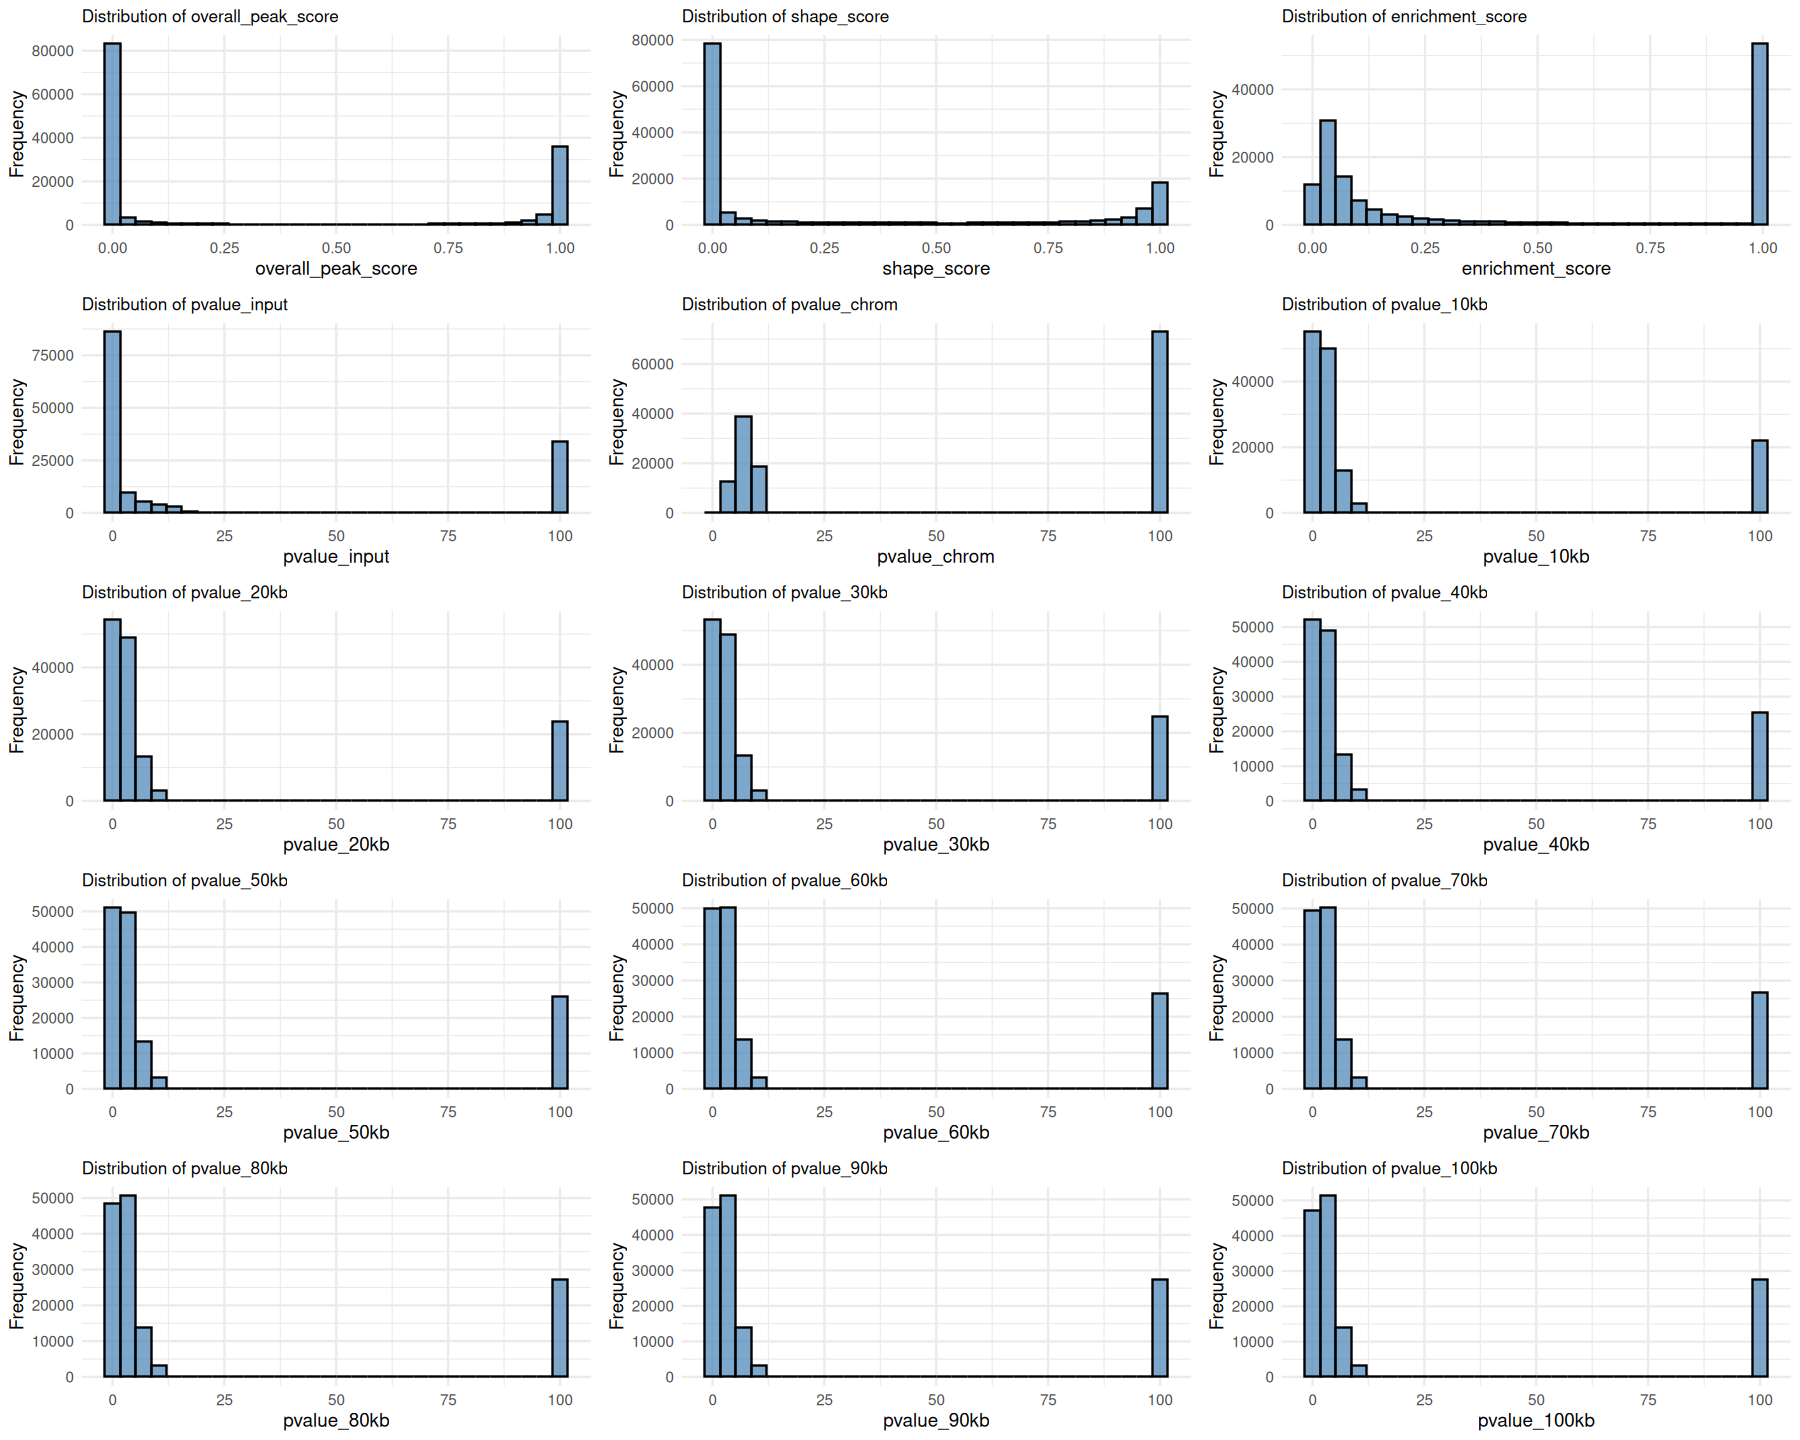

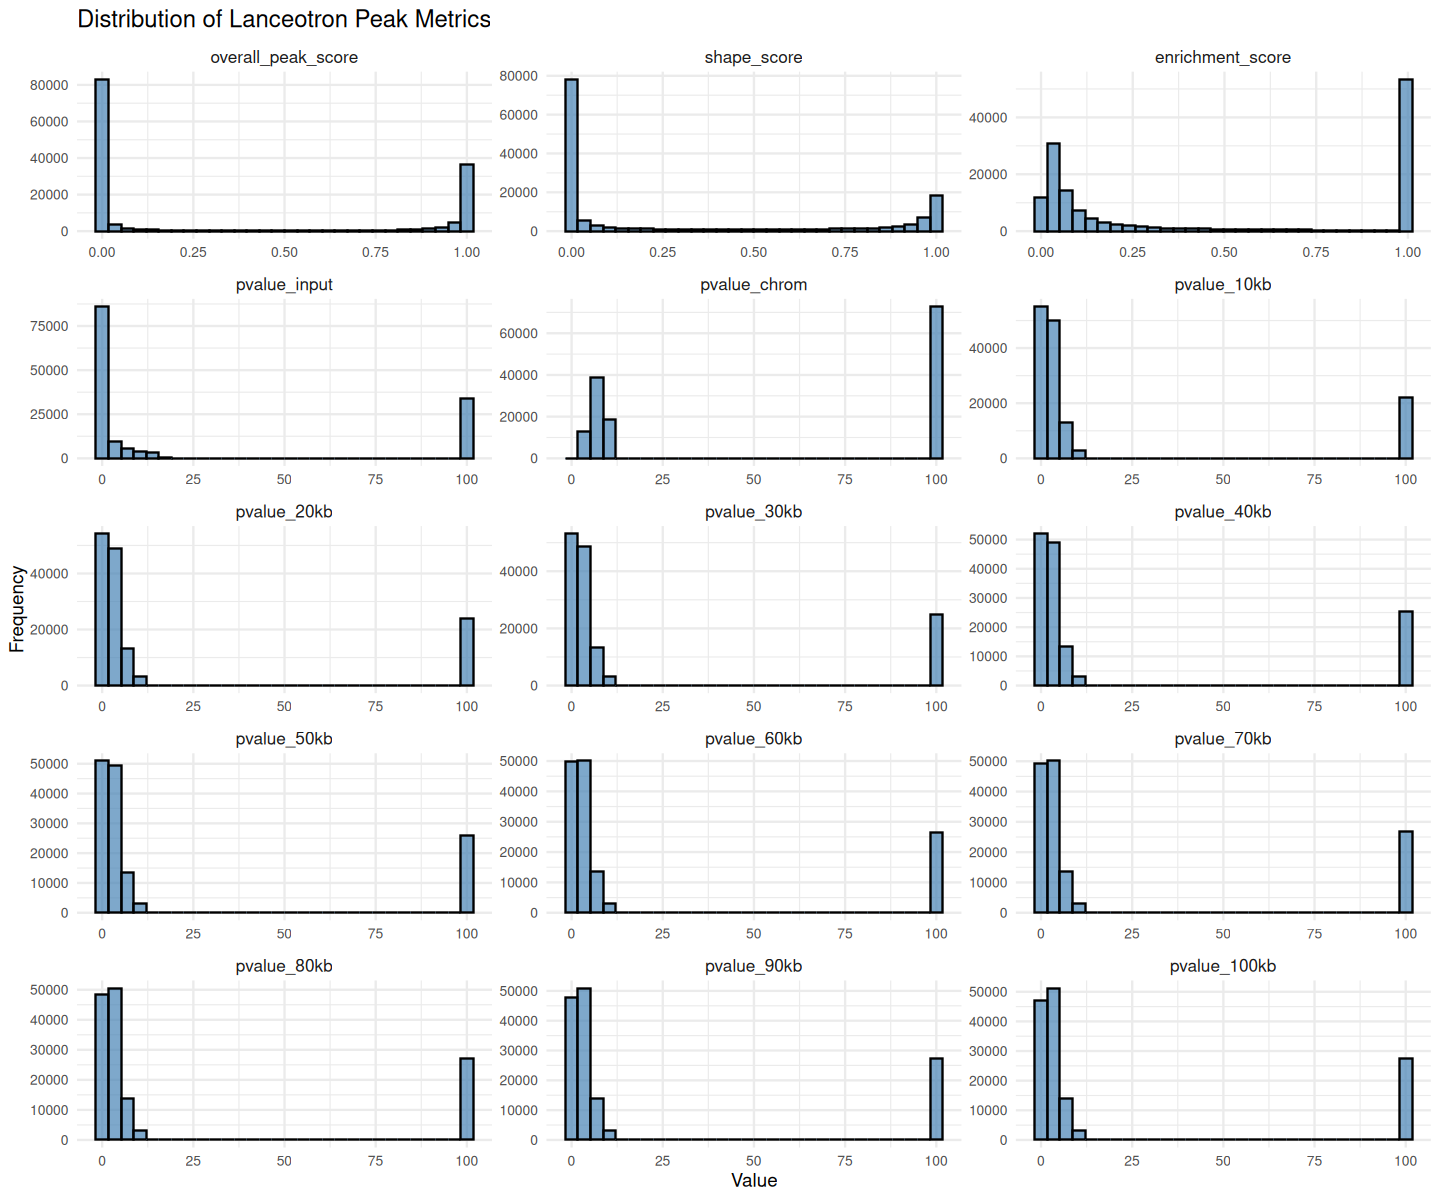

In [25]:
numerical_cols <- c(
  "overall_peak_score", "shape_score", "enrichment_score", 
  "pvalue_input", "pvalue_chrom", "pvalue_10kb", "pvalue_20kb", 
  "pvalue_30kb", "pvalue_40kb", "pvalue_50kb", "pvalue_60kb", 
  "pvalue_70kb", "pvalue_80kb", "pvalue_90kb", "pvalue_100kb"
)

# Create individual histograms for each variable
plot_list <- list()

for (col in numerical_cols) {
  p <- ggplot(lanceotron_peaks, aes_string(x = col)) +
    geom_histogram(bins = 30, fill = "steelblue", color = "black", alpha = 0.7) +
    labs(title = paste("Distribution of", col),
         x = col,
         y = "Frequency") +
    theme_minimal() +
    theme(plot.title = element_text(size = 10))
  
  plot_list[[col]] <- p
}

# Display all histograms in a grid
options(repr.plot.width = 15, repr.plot.height = 12)
grid.arrange(grobs = plot_list, ncol = 3)

# Alternative: Create a single plot with facets using melted data
lanceotron_melted <- melt(lanceotron_peaks[, ..numerical_cols], 
                         variable.name = "metric", 
                         value.name = "value")

# Faceted histogram plot
options(repr.plot.width = 12, repr.plot.height = 10)
faceted_plot <- ggplot(lanceotron_melted, aes(x = value)) +
  geom_histogram(bins = 30, fill = "steelblue", color = "black", alpha = 0.7) +
  facet_wrap(~metric, scales = "free", ncol = 3) +
  labs(title = "Distribution of Lanceotron Peak Metrics",
       x = "Value",
       y = "Frequency") +
  theme_minimal() +
  theme(strip.text = element_text(size = 10),
        axis.text = element_text(size = 8),
        plot.title = element_text(size = 14))

print(faceted_plot)

In [26]:
# Load it in your session
library(data.table)

# Comprehensive summary of numerical values
cat("\n=== SUMMARY STATISTICS FOR LANCEOTRON PEAKS ===\n\n")

# Basic summary statistics
summary_stats <- lanceotron_peaks[, lapply(.SD, function(x) {
  list(
    Count = length(x),
    Mean = round(mean(x, na.rm = TRUE), 4),
    Median = round(median(x, na.rm = TRUE), 4),
    SD = round(sd(x, na.rm = TRUE), 4),
    Min = round(min(x, na.rm = TRUE), 4),
    Max = round(max(x, na.rm = TRUE), 4),
    Q25 = round(quantile(x, 0.25, na.rm = TRUE), 4),
    Q75 = round(quantile(x, 0.75, na.rm = TRUE), 4),
    NA_count = sum(is.na(x))
  )
}), .SDcols = numerical_cols]

# Convert to a more readable format
summary_df <- data.frame(
  Metric = rep(numerical_cols, each = 9),
  Statistic = rep(c("Count", "Mean", "Median", "SD", "Min", "Max", "Q25", "Q75", "NA_count"), length(numerical_cols)),
  Value = unlist(summary_stats)
)

# Reshape for better display using data.table's dcast
summary_table <- dcast(setDT(summary_df), Metric ~ Statistic, value.var = "Value")

print(summary_table)

# Additional insights
cat("\n=== KEY INSIGHTS ===\n")
cat("Total number of peaks:", nrow(lanceotron_peaks), "\n")
cat("Chromosomes represented:", length(unique(lanceotron_peaks$chrom)), "\n")

# Peak score categories
high_overall <- sum(lanceotron_peaks$overall_peak_score > quantile(lanceotron_peaks$overall_peak_score, 0.75, na.rm = TRUE), na.rm = TRUE)
cat("High-scoring peaks (top 25%):", high_overall, "\n")

# P-value significance counts (assuming p < 0.05 is significant)
pvalue_cols <- grep("pvalue", numerical_cols, value = TRUE)
for (col in pvalue_cols) {
  significant <- sum(lanceotron_peaks[[col]] < 0.05, na.rm = TRUE)
  cat(paste0("Significant peaks (p<0.05) for ", col, ": "), significant, 
      " (", round(100 * significant / nrow(lanceotron_peaks), 1), "%)\n")
}

# Range information
peak_ranges <- lanceotron_peaks[, .(
  median_width = median(end - start, na.rm = TRUE),
  mean_width = round(mean(end - start, na.rm = TRUE), 0),
  min_width = min(end - start, na.rm = TRUE),
  max_width = max(end - start, na.rm = TRUE)
)]

cat("\n=== PEAK WIDTH STATISTICS ===\n")
cat("Median peak width:", peak_ranges$median_width, "bp\n")
cat("Mean peak width:", peak_ranges$mean_width, "bp\n")
cat("Range:", peak_ranges$min_width, "-", peak_ranges$max_width, "bp\n")


=== SUMMARY STATISTICS FOR LANCEOTRON PEAKS ===

Key: <Metric>
                Metric  Count   Max    Mean   Median   Min NA_count    Q25
                <char>  <num> <num>   <num>    <num> <num>    <num>  <num>
 1:   enrichment_score 143167     1  0.4548   0.1823 0.006        0 0.0410
 2: overall_peak_score 143167     1  0.3430   0.0007 0.000        0 0.0000
 3:       pvalue_100kb 143167   100 21.4868   2.6648 0.000        0 1.3852
 4:        pvalue_10kb 143167   100 17.6372   2.2822 0.000        0 1.1890
 5:        pvalue_20kb 143167   100 18.7749   2.3549 0.000        0 1.2017
 6:        pvalue_30kb 143167   100 19.4801   2.4051 0.000        0 1.2245
 7:        pvalue_40kb 143167   100 19.9590   2.4471 0.000        0 1.2539
 8:        pvalue_50kb 143167   100 20.3305   2.4951 0.000        0 1.2817
 9:        pvalue_60kb 143167   100 20.6365   2.5341 0.000        0 1.3089
10:        pvalue_70kb 143167   100 20.8904   2.5722 0.000        0 1.3282
11:        pvalue_80kb 143167   100 

In [27]:
# Keep only columns 1–4 (BED-like: chrom, start, end, score)
lanceotron_peaks_bed <- lanceotron_peaks[, 1:4]
head(lanceotron_peaks_bed, 2)
dim(lanceotron_peaks_bed)

chrom,start,end,overall_peak_score
<chr>,<int>,<int>,<dbl>
chr1,28136,28325,0.002789292
chr1,28503,29894,0.959739100


[1] 143167      4

In [28]:
# Select peaks with p-value < 0.05
lanceotron_peaks_p0.05 <- lanceotron_peaks[pvalue_input < 0.05]

# Display information about the selected peaks
cat("=== SELECTED SIGNIFICANT PEAKS (p < 0.05) ===\n")
cat("Total significant peaks:", nrow(lanceotron_peaks_p0.05), "\n")
cat("Percentage of total peaks:", round(100 * nrow(lanceotron_peaks_p0.05) / nrow(lanceotron_peaks), 2), "%\n\n")

=== SELECTED SIGNIFICANT PEAKS (p < 0.05) ===
Total significant peaks: 70591 
Percentage of total peaks: 49.31 %



In [29]:
lanceotron_peaks_p0.05_bed <- lanceotron_peaks_p0.05[, .(chrom, start, end, overall_peak_score)]

# Display information about the BED file
cat("=== BED FILE CREATED FROM SIGNIFICANT PEAKS ===\n")
cat("Columns in BED file:", paste(colnames(lanceotron_peaks_p0.05_bed), collapse = ", "), "\n")
cat("Number of peaks in BED file:", nrow(lanceotron_peaks_p0.05_bed), "\n\n")

# Show first few rows
cat("First 5 rows of BED file:\n")
print(head(lanceotron_peaks_p0.05_bed, 5))

=== BED FILE CREATED FROM SIGNIFICANT PEAKS ===
Columns in BED file: chrom, start, end, overall_peak_score 
Number of peaks in BED file: 70591 

First 5 rows of BED file:
    chrom  start    end overall_peak_score
   <char>  <int>  <int>              <num>
1:   chr1  28136  28325       0.0027892923
2:   chr1 140735 142333       0.3109075700
3:   chr1 142672 143415       0.1573427300
4:   chr1 144005 144627       0.0017882321
5:   chr1 148533 149001       0.0005718348



=== PEAK SCORE STATISTICS ===
Number of peaks: 70591 
Mean peak score: 0.2742 
Median peak score: 3e-04 
Standard deviation: 0.421 
Min peak score: 0 
Max peak score: 1 
Q1 (25th percentile): 0 
Q2 (50th percentile): 3e-04 
Q3 (75th percentile): 0.7776 


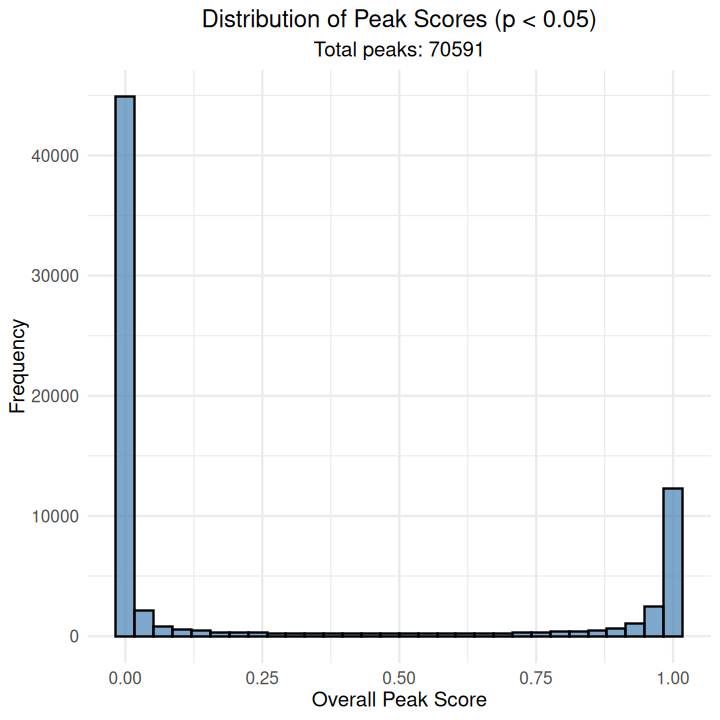

In [30]:
options(repr.plot.width = 6, repr.plot.height = 6)

# Create histogram of overall_peak_score for significant peaks
peak_score_histogram <- ggplot(lanceotron_peaks_p0.05, aes(x = overall_peak_score)) +
  geom_histogram(bins = 30, fill = "steelblue", color = "black", alpha = 0.7) +
  labs(title = "Distribution of Peak Scores (p < 0.05)",
       subtitle = paste("Total peaks:", nrow(lanceotron_peaks_p0.05)),
       x = "Overall Peak Score",
       y = "Frequency") +
  theme_minimal() +
  theme(plot.title = element_text(size = 14, hjust = 0.5),
        plot.subtitle = element_text(size = 12, hjust = 0.5),
        axis.title = element_text(size = 12),
        axis.text = element_text(size = 10))

# Display the plot
print(peak_score_histogram)

# Summary statistics for the peak scores
cat("\n=== PEAK SCORE STATISTICS ===\n")
cat("Number of peaks:", nrow(lanceotron_peaks_p0.05), "\n")
cat("Mean peak score:", round(mean(lanceotron_peaks_p0.05$overall_peak_score, na.rm = TRUE), 4), "\n")
cat("Median peak score:", round(median(lanceotron_peaks_p0.05$overall_peak_score, na.rm = TRUE), 4), "\n")
cat("Standard deviation:", round(sd(lanceotron_peaks_p0.05$overall_peak_score, na.rm = TRUE), 4), "\n")
cat("Min peak score:", round(min(lanceotron_peaks_p0.05$overall_peak_score, na.rm = TRUE), 4), "\n")
cat("Max peak score:", round(max(lanceotron_peaks_p0.05$overall_peak_score, na.rm = TRUE), 4), "\n")

# Quartiles
quartiles <- quantile(lanceotron_peaks_p0.05$overall_peak_score, probs = c(0.25, 0.5, 0.75), na.rm = TRUE)
cat("Q1 (25th percentile):", round(quartiles[1], 4), "\n")
cat("Q2 (50th percentile):", round(quartiles[2], 4), "\n")
cat("Q3 (75th percentile):", round(quartiles[3], 4), "\n")

In [31]:
str(bind_sites_gr) 
str(peaks_q1_bed) 
str(peaks_q2_bed)
str(merged_sites)

str(clam_bed)

str(lanceotron_peaks)
str(lanceotron_peaks_bed)
str(lanceotron_peaks_p0.05) 
str(lanceotron_peaks_p0.05_bed)

Formal class 'GRanges' [package "GenomicRanges"] with 7 slots
  ..@ seqnames       :Formal class 'Rle' [package "S4Vectors"] with 4 slots
  .. .. ..@ values         : Factor w/ 25 levels "chr1","chr10",..: 1 2 3 4 5 6 7 8 9 10 ...
  .. .. ..@ lengths        : int [1:25] 18644 5674 9031 8263 1877 4368 4572 9510 13678 1702 ...
  .. .. ..@ elementMetadata: NULL
  .. .. ..@ metadata       : list()
  ..@ ranges         :Formal class 'IRanges' [package "IRanges"] with 6 slots
  .. .. ..@ start          : int [1:167497] 12648 14406 14430 14757 14794 15833 16675 16722 16857 16890 ...
  .. .. ..@ width          : int [1:167497] 1 4 3 1 3 2 1 5 1 3 ...
  .. .. ..@ NAMES          : NULL
  .. .. ..@ elementType    : chr "ANY"
  .. .. ..@ elementMetadata: NULL
  .. .. ..@ metadata       : list()
  ..@ strand         :Formal class 'Rle' [package "S4Vectors"] with 4 slots
  .. .. ..@ values         : Factor w/ 3 levels "+","-","*": 1 2 1 2 1 2 1 2 1 2 ...
  .. .. ..@ lengths        : int [1:50] 8976 

In [32]:
# str(bind_sites_gr) 
# str(peaks_q1_bed) 
# str(peaks_q2_bed)
# str(merged_sites)

# str(clam_bed)

# str(lanceotron_peaks)
# str(lanceotron_peaks_bed)
# str(lanceotron_peaks_p0.05) 
# str(lanceotron_peaks_p0.05_bed)

In [33]:
class(bind_sites_gr) 
class(peaks_q1_bed) 
class(peaks_q2_bed)
class(merged_sites)

class(clam_bed)

class(lanceotron_peaks)
class(lanceotron_peaks_bed)
class(lanceotron_peaks_p0.05) 
class(lanceotron_peaks_p0.05_bed)

[1] "GRanges"
attr(,"package")
[1] "GenomicRanges"

[1] "data.frame"

[1] "data.frame"

[1] "GRanges"
attr(,"package")
[1] "GenomicRanges"

[1] "data.table" "data.frame"

[1] "data.table" "data.frame"

[1] "data.table" "data.frame"

[1] "data.table" "data.frame"

[1] "data.table" "data.frame"

In [34]:
# Transform peaks_q1_bed to GRanges (using correct column names: chr, start, end, name, score, strand)
peaks_q1_bed_gr <- GRanges(
  seqnames = peaks_q1_bed$chr,
  ranges = IRanges(start = peaks_q1_bed$start, end = peaks_q1_bed$end),
  strand = peaks_q1_bed$strand,
  name = peaks_q1_bed$name,
  score = peaks_q1_bed$score
)

# Transform peaks_q2_bed to GRanges (assuming same structure)
peaks_q2_bed_gr <- GRanges(
  seqnames = peaks_q2_bed$chr,
  ranges = IRanges(start = peaks_q2_bed$start, end = peaks_q2_bed$end),
  strand = peaks_q2_bed$strand,
  name = peaks_q2_bed$name,
  score = peaks_q2_bed$score
)

# Verify transformation
cat("=== TRANSFORMATION RESULTS ===\n")
cat("peaks_q1_bed_gr class:", class(peaks_q1_bed_gr), "\n")
cat("peaks_q1_bed_gr length:", length(peaks_q1_bed_gr), "\n")
cat("peaks_q2_bed_gr class:", class(peaks_q2_bed_gr), "\n")
cat("peaks_q2_bed_gr length:", length(peaks_q2_bed_gr), "\n\n")

cat("class : merged_sites")
class(merged_sites)

=== TRANSFORMATION RESULTS ===
peaks_q1_bed_gr class: GRanges 
peaks_q1_bed_gr length: 125568 
peaks_q2_bed_gr class: GRanges 
peaks_q2_bed_gr length: 83734 

class : merged_sites

[1] "GRanges"
attr(,"package")
[1] "GenomicRanges"

In [35]:
head(clam_bed)

chrom,start,end,transcript,score,strand
<chr>,<int>,<int>,<chr>,<int>,<chr>
chr1,15996,16096,ENSG00000227232-1,1000,-
chr1,629871,629971,ENSG00000293331-1,1000,-
chr1,629971,630071,ENSG00000293331-2,1000,-
chr1,630871,630971,ENSG00000293331-3,1000,-
chr1,631771,631871,ENSG00000293331-4,1000,-
chr1,632871,632971,ENSG00000293331-5,1000,-


In [36]:
# Check current class of clam_bed
cat("=== CURRENT CLASS ===\n")
cat("clam_bed class:", class(clam_bed), "\n")
cat("clam_bed dimensions:", dim(clam_bed), "\n\n")

# Show structure
cat("clam_bed columns:", paste(colnames(clam_bed), collapse = ", "), "\n\n")

# Load required library
library(GenomicRanges)

# Transform clam_bed to GRanges (using columns: chrom, start, end, transcript, score, strand)
clam_bed_gr <- GRanges(
  seqnames = clam_bed$chrom,
  ranges = IRanges(start = clam_bed$start, end = clam_bed$end),
  strand = clam_bed$strand,
  transcript = clam_bed$transcript,
  score = clam_bed$score
)

# Verify transformation
cat("=== TRANSFORMATION RESULTS ===\n")
cat("clam_bed_gr class:", class(clam_bed_gr), "\n")
cat("clam_bed_gr length:", length(clam_bed_gr), "\n\n")

# Show summary of created GRanges object
cat("=== GRANGES SUMMARY ===\n")
print(clam_bed_gr)

# Show first few ranges
cat("\nFirst 5 ranges:\n")
print(head(clam_bed_gr, 2))


=== CURRENT CLASS ===
clam_bed class: data.table data.frame 
clam_bed dimensions: 33104 6 

clam_bed columns: chrom, start, end, transcript, score, strand 

=== TRANSFORMATION RESULTS ===
clam_bed_gr class: GRanges 
clam_bed_gr length: 33104 

=== GRANGES SUMMARY ===
GRanges object with 33104 ranges and 2 metadata columns:
            seqnames        ranges strand |        transcript     score
               <Rle>     <IRanges>  <Rle> |       <character> <integer>
      [1]       chr1   15996-16096      - | ENSG00000227232-1      1000
      [2]       chr1 629871-629971      - | ENSG00000293331-1      1000
      [3]       chr1 629971-630071      - | ENSG00000293331-2      1000
      [4]       chr1 630871-630971      - | ENSG00000293331-3      1000
      [5]       chr1 631771-631871      - | ENSG00000293331-4      1000
      ...        ...           ...    ... .               ...       ...
  [33100] GL000195.1   49039-49139      - | ENSG00000276256-1      1000
  [33101] GL000219.1   5692

In [37]:
head(lanceotron_peaks_bed, 3)
head(lanceotron_peaks_p0.05_bed, 3)

chrom,start,end,overall_peak_score
<chr>,<int>,<int>,<dbl>
chr1,28136,28325,0.002789292
chr1,28503,29894,0.959739100
chr1,90126,90541,0.001132109


chrom,start,end,overall_peak_score
<chr>,<int>,<int>,<dbl>
chr1,28136,28325,0.002789292
chr1,140735,142333,0.310907570
chr1,142672,143415,0.157342730


In [38]:
# Check current classes
cat("=== CURRENT CLASSES ===\n")
cat("lanceotron_peaks_bed class:", class(lanceotron_peaks_bed), "\n")
cat("lanceotron_peaks_p0.05 class:", class(lanceotron_peaks_p0.05), "\n")
cat("lanceotron_peaks_p0.05_bed class:", class(lanceotron_peaks_p0.05_bed), "\n\n")

# Load required library
library(GenomicRanges)

# Transform lanceotron_peaks_bed to GRanges
lanceotron_peaks_bed_gr <- GRanges(
  seqnames = lanceotron_peaks_bed$chrom,
  ranges = IRanges(start = lanceotron_peaks_bed$start, end = lanceotron_peaks_bed$end),
  strand = "*",
  overall_peak_score = lanceotron_peaks_bed$overall_peak_score
)

# Transform lanceotron_peaks_p0.05_bed to GRanges
lanceotron_peaks_p0.05_bed_gr <- GRanges(
  seqnames = lanceotron_peaks_p0.05_bed$chrom,
  ranges = IRanges(start = lanceotron_peaks_p0.05_bed$start, end = lanceotron_peaks_p0.05_bed$end),
  strand = "*",
  overall_peak_score = lanceotron_peaks_p0.05_bed$overall_peak_score
)

# Check the results
cat("=== TRANSFORMATION RESULTS ===\n")
cat("lanceotron_peaks_bed_gr length:", format(length(lanceotron_peaks_bed_gr), big.mark = ","), "\n")
cat("lanceotron_peaks_p0.05_bed_gr length:", format(length(lanceotron_peaks_p0.05_bed_gr), big.mark = ","), "\n\n")

# Show first few entries
cat("First 3 entries of lanceotron_peaks_bed_gr:\n")
print(head(lanceotron_peaks_bed_gr, 3))

cat("\nFirst 3 entries of lanceotron_peaks_p0.05_bed_gr:\n")
print(head(lanceotron_peaks_p0.05_bed_gr, 3))



=== CURRENT CLASSES ===
lanceotron_peaks_bed class: data.table data.frame 
lanceotron_peaks_p0.05 class: data.table data.frame 
lanceotron_peaks_p0.05_bed class: data.table data.frame 

=== TRANSFORMATION RESULTS ===
lanceotron_peaks_bed_gr length: 143,167 
lanceotron_peaks_p0.05_bed_gr length: 70,591 

First 3 entries of lanceotron_peaks_bed_gr:
GRanges object with 3 ranges and 1 metadata column:
      seqnames      ranges strand | overall_peak_score
         <Rle>   <IRanges>  <Rle> |          <numeric>
  [1]     chr1 28136-28325      * |         0.00278929
  [2]     chr1 28503-29894      * |         0.95973910
  [3]     chr1 90126-90541      * |         0.00113211
  -------
  seqinfo: 24 sequences from an unspecified genome; no seqlengths

First 3 entries of lanceotron_peaks_p0.05_bed_gr:
GRanges object with 3 ranges and 1 metadata column:
      seqnames        ranges strand | overall_peak_score
         <Rle>     <IRanges>  <Rle> |          <numeric>
  [1]     chr1   28136-28325   

In [39]:
cat("=== ALL GRANGES OBJECTS CREATED ===\n\n")

# List all GRanges objects
granges_list <- list(
  "pureclip" = bind_sites_gr, 
  "pureclip_q1" = peaks_q1_bed_gr,
  "pureclip_q2" = peaks_q2_bed_gr,
  "pureclip_merged" = merged_sites,
  "clam" = clam_bed_gr,
  "lanceotron_all" = lanceotron_peaks_bed_gr,
  "lanceotron_p0.05" = lanceotron_peaks_p0.05_bed_gr
)

# Display summary for each object
for (name in names(granges_list)) {
  obj <- granges_list[[name]]
  cat(sprintf("%-30s: %s entries\n", name, format(length(obj), big.mark = ",")))
}

=== ALL GRANGES OBJECTS CREATED ===

pureclip                      : 167,497 entries
pureclip_q1                   : 125,568 entries
pureclip_q2                   : 83,734 entries
pureclip_merged               : 96,346 entries
clam                          : 33,104 entries
lanceotron_all                : 143,167 entries
lanceotron_p0.05              : 70,591 entries


In [40]:
# pureclip (bind_sites_gr) - PureCLIP binding sites
# pureclip_q1 (peaks_q1_bed_gr) - Q1 quartile peaks
# pureclip_q2 (peaks_q2_bed_gr) - Q2 quartile peaks
# clam (clam_bed_gr) - CLAM binding sites
# lanceotron_all (lanceotron_peaks_bed_gr) - All Lanceotron peaks
# lanceotron_p0.05 (lanceotron_peaks_p0.05_bed_gr) - Significant Lanceotron peaks

In [41]:
# Simple overlap analysis: CLAM vs all other datasets
library(GenomicRanges)

# Extract objects
pureclip <- granges_list[["pureclip"]]
pureclip_q1 <- granges_list[["pureclip_q1"]]
pureclip_q2 <- granges_list[["pureclip_q2"]]
pureclip_merged <- granges_list[["pureclip_merged"]]
clam <- granges_list[["clam"]]
lanceotron_all <- granges_list[["lanceotron_all"]]
lanceotron_p005 <- granges_list[["lanceotron_p0.05"]]

cat("=== CLAM OVERLAP ANALYSIS ===\n\n")

# 1. PureCLIP vs CLAM
overlap1 <- findOverlaps(pureclip, clam, ignore.strand = TRUE)
cat("PureCLIP vs CLAM:\n")
cat("  PureCLIP overlapping:", length(unique(queryHits(overlap1))), "/", length(pureclip), 
    "(", round(100 * length(unique(queryHits(overlap1))) / length(pureclip), 1), "%)\n")
cat("  CLAM overlapping:", length(unique(subjectHits(overlap1))), "/", length(clam), 
    "(", round(100 * length(unique(subjectHits(overlap1))) / length(clam), 1), "%)\n\n")

# 2. PureCLIP_Q1 vs CLAM
overlap2 <- findOverlaps(pureclip_q1, clam, ignore.strand = TRUE)
cat("PureCLIP_Q1 vs CLAM:\n")
cat("  PureCLIP_Q1 overlapping:", length(unique(queryHits(overlap2))), "/", length(pureclip_q1), 
    "(", round(100 * length(unique(queryHits(overlap2))) / length(pureclip_q1), 1), "%)\n")
cat("  CLAM overlapping:", length(unique(subjectHits(overlap2))), "/", length(clam), 
    "(", round(100 * length(unique(subjectHits(overlap2))) / length(clam), 1), "%)\n\n")

# 3. PureCLIP_Q2 vs CLAM
overlap3 <- findOverlaps(pureclip_q2, clam, ignore.strand = TRUE)
cat("PureCLIP_Q2 vs CLAM:\n")
cat("  PureCLIP_Q2 overlapping:", length(unique(queryHits(overlap3))), "/", length(pureclip_q2), 
    "(", round(100 * length(unique(queryHits(overlap3))) / length(pureclip_q2), 1), "%)\n")
cat("  CLAM overlapping:", length(unique(subjectHits(overlap3))), "/", length(clam), 
    "(", round(100 * length(unique(subjectHits(overlap3))) / length(clam), 1), "%)\n\n")

# 4. Lanceotron_all vs CLAM
overlap4 <- findOverlaps(lanceotron_all, clam, ignore.strand = TRUE)
cat("Lanceotron_all vs CLAM:\n")
cat("  Lanceotron_all overlapping:", length(unique(queryHits(overlap4))), "/", length(lanceotron_all), 
    "(", round(100 * length(unique(queryHits(overlap4))) / length(lanceotron_all), 1), "%)\n")
cat("  CLAM overlapping:", length(unique(subjectHits(overlap4))), "/", length(clam), 
    "(", round(100 * length(unique(subjectHits(overlap4))) / length(clam), 1), "%)\n\n")

# 5. Lanceotron_p0.05 vs CLAM
overlap5 <- findOverlaps(lanceotron_p005, clam, ignore.strand = TRUE)
cat("Lanceotron_p0.05 vs CLAM:\n")
cat("  Lanceotron_p0.05 overlapping:", length(unique(queryHits(overlap5))), "/", length(lanceotron_p005), 
    "(", round(100 * length(unique(queryHits(overlap5))) / length(lanceotron_p005), 1), "%)\n")
cat("  CLAM overlapping:", length(unique(subjectHits(overlap5))), "/", length(clam), 
    "(", round(100 * length(unique(subjectHits(overlap5))) / length(clam), 1), "%)\n\n")

# Summary table
cat("=== SUMMARY TABLE ===\n")
summary_df <- data.frame(
  Dataset = c("PureCLIP", "PureCLIP_Q1", "PureCLIP_Q2", "Lanceotron_all", "Lanceotron_p0.05"),
  Total_Peaks = c(length(pureclip), length(pureclip_q1), length(pureclip_q2), 
                  length(lanceotron_all), length(lanceotron_p005)),
  Overlapping_CLAM = c(
    length(unique(queryHits(overlap1))),
    length(unique(queryHits(overlap2))),
    length(unique(queryHits(overlap3))),
    length(unique(queryHits(overlap4))),
    length(unique(queryHits(overlap5)))
  ),
  Overlap_Percentage = c(
    round(100 * length(unique(queryHits(overlap1))) / length(pureclip), 1),
    round(100 * length(unique(queryHits(overlap2))) / length(pureclip_q1), 1),
    round(100 * length(unique(queryHits(overlap3))) / length(pureclip_q2), 1),
    round(100 * length(unique(queryHits(overlap4))) / length(lanceotron_all), 1),
    round(100 * length(unique(queryHits(overlap5))) / length(lanceotron_p005), 1)
  )
)

print(summary_df)

=== CLAM OVERLAP ANALYSIS ===

PureCLIP vs CLAM:
  PureCLIP overlapping: 40709 / 167497 ( 24.3 %)
  CLAM overlapping: 20077 / 33104 ( 60.6 %)

PureCLIP_Q1 vs CLAM:
  PureCLIP_Q1 overlapping: 32318 / 125568 ( 25.7 %)
  CLAM overlapping: 17644 / 33104 ( 53.3 %)

PureCLIP_Q2 vs CLAM:
  PureCLIP_Q2 overlapping: 22808 / 83734 ( 27.2 %)
  CLAM overlapping: 14297 / 33104 ( 43.2 %)

Lanceotron_all vs CLAM:
  Lanceotron_all overlapping: 14756 / 143167 ( 10.3 %)
  CLAM overlapping: 32399 / 33104 ( 97.9 %)

Lanceotron_p0.05 vs CLAM:
  Lanceotron_p0.05 overlapping: 3150 / 70591 ( 4.5 %)
  CLAM overlapping: 4851 / 33104 ( 14.7 %)

=== SUMMARY TABLE ===
           Dataset Total_Peaks Overlapping_CLAM Overlap_Percentage
1         PureCLIP      167497            40709               24.3
2      PureCLIP_Q1      125568            32318               25.7
3      PureCLIP_Q2       83734            22808               27.2
4   Lanceotron_all      143167            14756               10.3
5 Lanceotron_p0.0

In [42]:
# CLAM overlap analysis with Venn diagrams and percentages
library(GenomicRanges)
library(VennDiagram)
library(grid)
library(gridExtra)

# Extract objects
pureclip <- granges_list[["pureclip"]]
pureclip_q1 <- granges_list[["pureclip_q1"]]
pureclip_q2 <- granges_list[["pureclip_q2"]]
pureclip_merged <- granges_list[["pureclip_merged"]]
clam <- granges_list[["clam"]]
lanceotron_all <- granges_list[["lanceotron_all"]]
lanceotron_p005 <- granges_list[["lanceotron_p0.05"]]

# Total CLAM peaks for percentage calculations
total_clam <- length(clam)
cat("=== CLAM OVERLAP ANALYSIS ===\n")
cat("Total CLAM peaks:", format(total_clam, big.mark = ","), "\n\n")

# Create CLAM identifiers for Venn diagrams
clam_ids <- paste0(seqnames(clam), ":", start(clam), "-", end(clam))

# Function to get overlapping CLAM peaks and create Venn diagram
create_clam_venn <- function(dataset, dataset_name, title_suffix) {
  # Find overlaps
  overlaps <- findOverlaps(dataset, clam, ignore.strand = TRUE)
  overlapping_clam_indices <- unique(subjectHits(overlaps))
  overlapping_clam_ids <- clam_ids[overlapping_clam_indices]
  
  # Calculate percentage
  n_overlapping <- length(overlapping_clam_indices)
  percentage <- round(100 * n_overlapping / total_clam, 1)
  
  cat(sprintf("%-18s: %s / %s CLAM peaks (%s%%)\n", 
              dataset_name, 
              format(n_overlapping, big.mark = ","),
              format(total_clam, big.mark = ","),
              percentage))
  
  # Create Venn diagram
  venn_plot <- venn.diagram(
    x = list(
      CLAM = clam_ids,
      Dataset = overlapping_clam_ids
    ),
    category.names = c("CLAM", dataset_name),
    filename = NULL,
    output = TRUE,
    fill = c("lightblue", "lightcoral"),
    alpha = 0.7,
    cex = 1.2,
    fontfamily = "sans",
    cat.cex = 1.0,
    cat.fontfamily = "sans",
    main = paste("CLAM vs", title_suffix),
    main.cex = 1.2,
    margin = 0.1
  )
  
  return(list(plot = venn_plot, percentage = percentage, count = n_overlapping))
}

# Create Venn diagrams for each comparison
datasets <- list(
  list(data = pureclip, name = "PureCLIP", title = "PureCLIP"),
  list(data = pureclip_q1, name = "PureCLIP_Q1", title = "PureCLIP Q1"),
  list(data = pureclip_q2, name = "PureCLIP_Q2", title = "PureCLIP Q2"),
  list(data = pureclip_merged, name = "PureCLIP_merged", title = "PureCLIP merged"),
  list(data = lanceotron_all, name = "Lanceotron_all", title = "Lanceotron All"),
  list(data = lanceotron_p005, name = "Lanceotron_p0.05", title = "Lanceotron p<0.05")
)

venn_results <- list()
percentages <- c()
counts <- c()
names_list <- c()

for (i in 1:length(datasets)) {
  result <- create_clam_venn(datasets[[i]]$data, datasets[[i]]$name, datasets[[i]]$title)
  venn_results[[i]] <- result$plot
  percentages[i] <- result$percentage
  counts[i] <- result$count
  names_list[i] <- datasets[[i]]$name
}

cat("\n=== SUMMARY TABLE (ordered by CLAM coverage) ===\n")
summary_df <- data.frame(
  Dataset = names_list,
  CLAM_Overlapping = counts,
  CLAM_Percentage = percentages,
  stringsAsFactors = FALSE
)

# Sort by percentage
summary_df <- summary_df[order(-summary_df$CLAM_Percentage), ]
print(summary_df)

cat("\n=== RANKING BY CLAM COVERAGE ===\n")
for (i in 1:nrow(summary_df)) {
  cat(sprintf("%d. %s: %s%% (%s peaks)\n", 
              i, 
              summary_df$Dataset[i], 
              summary_df$CLAM_Percentage[i],
              format(summary_df$CLAM_Overlapping[i], big.mark = ",")))
}



Loading required package: grid

Loading required package: futile.logger



=== CLAM OVERLAP ANALYSIS ===
Total CLAM peaks: 33,104 

PureCLIP          : 20,077 / 33,104 CLAM peaks (60.6%)
PureCLIP_Q1       : 17,644 / 33,104 CLAM peaks (53.3%)
PureCLIP_Q2       : 14,297 / 33,104 CLAM peaks (43.2%)
PureCLIP_merged   : 22,047 / 33,104 CLAM peaks (66.6%)
Lanceotron_all    : 32,399 / 33,104 CLAM peaks (97.9%)
Lanceotron_p0.05  : 4,851 / 33,104 CLAM peaks (14.7%)

=== SUMMARY TABLE (ordered by CLAM coverage) ===
           Dataset CLAM_Overlapping CLAM_Percentage
5   Lanceotron_all            32399            97.9
4  PureCLIP_merged            22047            66.6
1         PureCLIP            20077            60.6
2      PureCLIP_Q1            17644            53.3
3      PureCLIP_Q2            14297            43.2
6 Lanceotron_p0.05             4851            14.7

=== RANKING BY CLAM COVERAGE ===
1. Lanceotron_all: 97.9% (32,399 peaks)
2. PureCLIP_merged: 66.6% (22,047 peaks)
3. PureCLIP: 60.6% (20,077 peaks)
4. PureCLIP_Q1: 53.3% (17,644 peaks)
5. PureCLIP_Q2

In [43]:
# Extract objects
# pureclip <- granges_list[["pureclip"]]
# pureclip_q1 <- granges_list[["pureclip_q1"]]
# pureclip_q2 <- granges_list[["pureclip_q2"]]
# pureclip_merged <- granges_list[["pureclip_merged"]]
# clam <- granges_list[["clam"]]
# lanceotron_all <- granges_list[["lanceotron_all"]]
# lanceotron_p005 <- granges_list[["lanceotron_p0.05"]]

In [44]:
# 167497 A27_13_pool.star.clam.PureCLIP.crosslink_sites.cov_inputSignal.bind.sites.bed
# 167497 A27_13_PureCLIP.crosslink_sites.cov_inputSignal.bind.sites.bed
# 109945 A27_13_pool.star.clam.PureCLIP.crosslink_sites.cov_inputSignal.bind.sites.extended20_merged_binding_sites.bed
# 33104 CLAM_13P_narrow_peaks.Richi.combined.bed
# 143167 LANCEOTRON_A27_13_lanceotron.star.clam.classical.chr.bed


In [45]:
# switching to bedtools

In [46]:
# BEDTOOLS

In [47]:
# ./script_extend_merge_pureclip.sh 
# -i A27_13_pool.star.clam.PureCLIP.crosslink_sites.cov_inputSignal.bind.sites.bed 
# -g hg38.chrom.sizes   -b 20 -d 50

In [48]:
# ./script_extend_merge_pureclip.sh -i A27_13_pool.star.clam.PureCLIP.crosslink_sites.cov_inputSignal.bind.sites.bed   
# -g hg38.chrom.sizes  
# -b 50 
# -d 50

In [49]:
# 58754 pureclip.A27_13_pool.star.clam.PureCLIP.crosslink_sites.cov_inputSignal.bind.sites.extend20.merged.d50.bed
# 48485 pureclip.A27_13_pool.star.clam.PureCLIP.crosslink_sites.cov_inputSignal.bind.sites.extend50.merged.d50.bed
# 70590 pureclip.A27_13_pool.star.clam.PureCLIP.crosslink_sites.cov_inputSignal.bind.sites.extend20.merged.d20.bed

In [50]:
# intersectBed -a CLAM_13P_narrow_peaks.Richi.combined.primary.chr.bed -b LANCEOTRON_A27_13_lanceotron.star.clam.classical.chr.bed -u | wc -l 
# 32397

In [51]:
# intersectBed -a CLAM_13P_narrow_peaks.Richi.combined.primary.chr.bed \
# -b A27_13_pool.star.clam.PureCLIP.crosslink_sites.cov_inputSignal.bind.sites.bed -u | wc -l 
# 20027

In [52]:
# intersectBed -a CLAM_13P_narrow_peaks.Richi.combined.primary.chr.bed \
# -b pureclip.A27_13_pool.star.clam.PureCLIP.crosslink_sites.cov_inputSignal.bind.sites.extend20.merged.d20.bed -u | wc -l 
# 21993

In [53]:
# intersectBed -a CLAM_13P_narrow_peaks.Richi.combined.primary.chr.bed \
# -b pureclip.A27_13_pool.star.clam.PureCLIP.crosslink_sites.cov_inputSignal.bind.sites.extend20.merged.d50.bed -u | wc -l 
# 21993

In [54]:
# intersectBed -a CLAM_13P_narrow_peaks.Richi.combined.primary.chr.bed \
# -b pureclip.A27_13_pool.star.clam.PureCLIP.crosslink_sites.cov_inputSignal.bind.sites.extend50.merged.d50.bed -u | wc -l 
# 23709

In [55]:
cat("Number of peaks:\n")
cat("pureclip:", length(pureclip), "\n")
cat("pureclip_merged:", length(pureclip_merged), "\n")
cat("clam:", length(clam), "\n")
cat("lanceotron_all:", length(lanceotron_all), "\n")


Number of peaks:
pureclip: 167497 
pureclip_merged: 96346 
clam: 33104 
lanceotron_all: 143167 
